In [1]:
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels
import csv
import pickle

# Processing Data from PostGRES Output

Creating a single JSON file for each participant from PostGRES data that contains a single list of all participant data

In [2]:
fileprefix = "pilot_2" # pilot_[1,2,4]
filepath = '../results/{}_results.json'.format(fileprefix)


In [3]:
with open(filepath, 'r') as f:
    all_data = json.load(f)

In [4]:
part_data = {}

count = 0
for participant in all_data['values']:
    count+=1
    print(count, participant[2])
    try:
        part_object = json.loads(participant[17])
        part_object["Beginhit"] = participant[11]
        part_object["Beginexp"] = participant[12]
        part_object["Endhit"] = participant[13]
        part_object["psiturkStatus"] = participant[15]
        part_object["browser"] = participant[5]
        part_object["platform"] = participant[6]
        part_object["language"] = participant[7]
        
        if part_object["workerId"].startswith("debug"):
            continue

        part_data[part_object["workerId"]] = part_object
        with open('../results/{}_{}.json'.format(fileprefix, part_object['workerId']), 'w') as fw:
            json.dump(part_object, fw)
    except:
        print("Fail")
        continue;

1 5f5aa6d5b8e6411a69e274d5
2 6170728496a5e625738361e6
Fail
3 5f233b5de2de0e0e11f9e78c
4 615cc11e1f9805f0282b1b12
5 63ff614d503cef468af42314
6 611c035fcf63d265705f5c3f
7 debugwnwyH
8 61238ae128da0cdc3fe7a9b6
9 5eeb2e5447d3cb013eb29033
10 5c64117e3d9d6600018f4a8e
11 debugZpGN4
12 60e2ebb6ad1d5ee0e515a7c5
13 5dffb7505cc380bf9945baf6
14 debugenCG7
15 5ef14fa1454675509fcc3676
16 6121664e030e824ff03ae0e9
17 5c7d8138896a0b00011c2f5d
18 642b10ff416509a1f4b0fd3e
19 609bfd97a7c95881330491d4
20 6166dab6703c96b787944f15
21 607cabdfb9addc46d23a0f19
22 60609964bc97b252dfb09949
23 5f6214a59413141f7cb2508c
24 610fcfe70592d59fc629f2a5
25 5d7d467f306346001a7a6844
26 5e4d8eda83dc301d9395adfb
27 5ca8b0cded17090016e1f1c1
28 5f99cbf0b14039000930f2cb
29 611e25b39724f47936d0dcab
30 5c3f1d6522d8d800015b6e58
31 5d966cada040790015da4922
32 6089aa8120d7418a70f3eba7
33 5eff9162a78aa106ea6a36ec
34 5ce2d3e491250a00018e04f4
35 5f31ef83efc0c913389d6554
36 5b1aa0433e5521000120f7a8
37 60bf62f6f8202f06afc581b2
38 5d24c21

In [5]:
part_data.keys()


dict_keys(['5f5aa6d5b8e6411a69e274d5', '5f233b5de2de0e0e11f9e78c', '615cc11e1f9805f0282b1b12', '63ff614d503cef468af42314', '611c035fcf63d265705f5c3f', '61238ae128da0cdc3fe7a9b6', '5eeb2e5447d3cb013eb29033', '5c64117e3d9d6600018f4a8e', '60e2ebb6ad1d5ee0e515a7c5', '5dffb7505cc380bf9945baf6', '5ef14fa1454675509fcc3676', '6121664e030e824ff03ae0e9', '5c7d8138896a0b00011c2f5d', '642b10ff416509a1f4b0fd3e', '609bfd97a7c95881330491d4', '6166dab6703c96b787944f15', '607cabdfb9addc46d23a0f19', '60609964bc97b252dfb09949', '5f6214a59413141f7cb2508c', '610fcfe70592d59fc629f2a5', '5d7d467f306346001a7a6844', '5e4d8eda83dc301d9395adfb', '5ca8b0cded17090016e1f1c1', '5f99cbf0b14039000930f2cb', '611e25b39724f47936d0dcab', '5c3f1d6522d8d800015b6e58', '5d966cada040790015da4922', '6089aa8120d7418a70f3eba7', '5eff9162a78aa106ea6a36ec', '5ce2d3e491250a00018e04f4', '5f31ef83efc0c913389d6554', '5b1aa0433e5521000120f7a8', '60bf62f6f8202f06afc581b2', '5d24c2146dd2960016cef0b7', '5af5262f1b55800001f4a418', '5ee9f569

# Reading Data from Already Created Participant Data Files

In [6]:
fileprefix = "pilot_2" # pilot_#, final
datafolder = '../results/'

all_part_files = [filename for filename in os.listdir(datafolder) if filename.startswith(fileprefix) and 'results' not in filename]
all_part_paths = [datafolder + filename for filename in all_part_files]

In [7]:
part_data = {}
for file in all_part_paths:
    with open(file, 'r') as f:
        participant = json.load(f)
        part_data[participant["workerId"]] = participant



In [8]:
len(part_data.keys())

85

# Analyzing Trial Data

Create a list of objects, one for each participant's data

In [9]:
part_stats_dicts = []
for participant in part_data.values():
    try:
        beginhit = datetime.datetime.strptime(participant['Beginhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginhit = None
    try:
        endhit = datetime.datetime.strptime(participant['Endhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        endhit = None
    try:    
        beginexp = datetime.datetime.strptime(participant['Beginexp'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginexp = None
    
    try:
        hitLength = (endhit-beginhit).seconds
    except TypeError:
        hitLength = None
    
    try:
        expLength = (endhit-beginexp).seconds
    except TypeError:
        expLength = None
        
    numPracTrials = 0
    trialLengths = []
    trialScores = []
    rewardsWithheld = []
    effort = "-1"
    age = None
    gender = None
    colorblind = None
    print(participant['workerId'])
    try:
        firstTrialStamp = participant['data'][0]['dateTime']
        lastTrialStamp = participant['data'][-1]['dateTime']
    except:
        print("No data")
        continue
    if hitLength is None:
        hitLength = (lastTrialStamp - firstTrialStamp) / 1000
    if expLength is None:
        expLength = (lastTrialStamp - firstTrialStamp) / 1000
        
    mdp_timestamps = {
        "start" : 0,
        "end" : 0,
        "done": False
    }
    current_state = "stroop_1"
    last_trial = participant['data'][0]
    finishHITReached = False
    demographicsAvailable = False
    feedback = ""
    alreadyParticipated = ""
    comments = ""
    whatStrategy = ""
    strategyImprove = ""
    difficult = ""
    num_correct_sequences = 0
    final_quiz_responses = None
    for idx, trial in enumerate(participant['data']):
        trial_type = trial['trialdata']['trial_type']
        try:
            trial_id = str(trial['trialdata']['trial_id'])
        except KeyError:
            trial_id = ""
        
        if participant['workerId'] == "5eb40f1f0d916d20d9db9144":
            print("{}\t{}\t{}".format(trial_type, trial_id, idx))
            
        if trial_id.startswith("mouselab_instructions_1") and not mdp_timestamps["done"]:
            mdp_timestamps["done"] = True
            mdp_timestamps["start"] = trial['dateTime']
        
        if "num_correct_sequences" in trial['trialdata']:
            num_correct_sequences = trial['trialdata']['num_correct_sequences']
        
        if trial_id.startswith("final_quiz"):
            mdp_timestamps["end"] = trial['dateTime']
            final_quiz_responses = trial['trialdata']['response']
                    
        if trial_type == 'mouselab-mdp':
            if trial_id.startswith('practice'):
                numPracTrials += 1
            else:
                trialLengths.append(trial['trialdata']['trialTime'])
                
                trialScores.append(trial['trialdata']['score'])
                rewardsWithheld.append(trial['trialdata']['withholdReward'])
        if trial_type == 'survey-html-form':
            
            if 'effort' in trial['trialdata']['response']:
                effort = trial['trialdata']['response']['effort']
                age = trial['trialdata']['response']['age']
                gender = trial['trialdata']['response']['gender']
                colorblind = trial['trialdata']['response']['colorblind']
                demographicsAvailable = True
        if trial_id.startswith("finish_fail"):
            feedback = trial['trialdata']['response']['Q0']
            age = trial['trialdata']['response']['Q1']
            gender = trial['trialdata']['response']['Q2']
            colorblind = trial['trialdata']['response']['Q3']
            comments = trial['trialdata']['response']['Q4']
            demographicsAvailable = True
        elif trial_type == 'survey-text':
            if trial_id.startswith("self_report"):
                whatStrategy = trial['trialdata']['response']['Q0']
                strategyImprove = trial['trialdata']['response']['Q1']
                difficult = trial['trialdata']['response']['Q2']
            elif not trial_id.startswith("answer"):
                #print(trial['trialdata'])
                feedback = trial['trialdata']['response']['Q0']
                alreadyParticipated = trial['trialdata']['response']['Q1']
                comments = trial['trialdata']['response']['Q2']
        
        if trial_type == 'html-button-response':
            if "Finish HIT" in trial['trialdata']['stimulus']:
                finishHITReached = True
        last_trial = trial

    dropoutPoint = None
    for obj, type_ in zip([mdp_timestamps], ["mdp"]):
        if obj["start"] > 0 and obj["end"] == 0:
            
            dropoutPoint = type_
            obj["end"] = lastTrialStamp
            
    if not dropoutPoint:
        if len(trialLengths) == 0:
            dropoutPoint = "beginning"
        elif not finishHITReached:
            dropoutPoint = "finishHIT"
            
    if dropoutPoint:
        print(participant['workerId'], dropoutPoint)
    part_stats_dict = {
        "workerId": participant['workerId'],
        "Beginhit": beginhit,
        "Endhit": endhit,
        "Beginexp": beginexp,
        "psiturkStatus" : participant["psiturkStatus"],
        "browser" : participant["browser"],
        "platform" : participant["platform"],
        "language" : participant["language"],
        "hitLength": hitLength,
        "expLength": expLength,
        "totalLengthSum": (lastTrialStamp - firstTrialStamp) / 1000,
        "numQuizAttempts": numPracTrials / 2,
        "trialLengths": trialLengths,
        "trialScores" : trialScores,
        "numTrialsCompleted": len(trialLengths),
        "rewardsWithheld": rewardsWithheld,
        "effort": effort,
        "age":age,
        "colorblind":colorblind,
        "gender":gender,
        "condition": participant['condition'],
        "mouselabLength" : (mdp_timestamps["end"] - mdp_timestamps["start"]) / 1000,
        "dropoutPoint" : dropoutPoint,
        "feedback": feedback,
        "alreadyParticipated": alreadyParticipated,
        "comments": comments,
        "finishHITReached": finishHITReached,
        "demographicsAvailable": demographicsAvailable,
        "whatStrategy": whatStrategy,
        "strategyImprove": strategyImprove,
        "difficult": difficult,
        "num_correct_sequences": num_correct_sequences,
        "final_quiz_responses": final_quiz_responses
    }
    if 'questiondata' in participant and 'final_score' in participant['questiondata']:
        part_stats_dict['finalScore'] = participant['questiondata']['final_score']
    else:
        part_stats_dict['finalScore'] = sum([score for (score, withheld) in zip(trialScores, rewardsWithheld) if not withheld])
    
    part_stats_dict["expLengthSum"] = part_stats_dict["mouselabLength"]
    part_stats_dict["expLengthDiff"] = part_stats_dict["expLengthSum"] - part_stats_dict["expLength"]
    if len(trialLengths) > 0:
        part_stats_dict["averageTrialLength"] = sum(trialLengths) / len(trialLengths)
        part_stats_dict["propWithheld"] = sum(rewardsWithheld) / len(rewardsWithheld)
        
    part_stats_dicts.append(part_stats_dict)
    

5f9d4a9335e325252a9715a4
63fce962483161329a0dbf83
6157481bc73bba8566fed3be
6107207614dc21c9a0cfb932
5b8f9a9d8830c60001dc3aee
6089aa8120d7418a70f3eba7
5c64117e3d9d6600018f4a8e
5e5bd71ee0777c3bbe5b108c
642aff660cfe16118b2fbe90
642aff660cfe16118b2fbe90 beginning
60b63cc430b27a19351d92c3
5eeb2e5447d3cb013eb29033
61260fcc8fa5d80837df7af4
60bf62f6f8202f06afc581b2
5d7d467f306346001a7a6844
5d93a24dcf721400155ed43e
611e25b39724f47936d0dcab
646287f9580aef997b71a6cf
646287f9580aef997b71a6cf mdp
610fcfe70592d59fc629f2a5
6166dab6703c96b787944f15
5d24c2146dd2960016cef0b7
5df938ca8390796b7ce84de1
606384c05e79d8623cc05ae8
5f7cb81187c56c12cc845ccd
5f5aa6d5b8e6411a69e274d5
5d67b6d92b7448000173d95a
5f233b5de2de0e0e11f9e78c
614ef8c07b0658a3a07d0548
61238ae128da0cdc3fe7a9b6
6176c4957007d9c5ef29a9ce
642b10ff416509a1f4b0fd3e
61533ead92c280c34cc22482
60609964bc97b252dfb09949
60bdecc23648063db2bb828a
5ce2d3e491250a00018e04f4
5d966cada040790015da4922
5b157b3bea49770001630696
5af5262f1b55800001f4a418
5af5262f1b5

In [10]:
stats_df = pd.DataFrame(part_stats_dicts)
print(len(stats_df))
filter_cols = ["workerId", "Beginhit", "hitLength", "expLength", "condition", "numQuizAttempts", "numTrialsCompleted", "mouselabLength", "finalScore", "num_correct_sequences", "dropoutPoint", "finishHITReached", "psiturkStatus", "effort", "demographicsAvailable"]
stats_df[filter_cols]

85


,workerId,Beginhit,hitLength,expLength,condition,numQuizAttempts,numTrialsCompleted,mouselabLength,finalScore,num_correct_sequences,dropoutPoint,finishHITReached,psiturkStatus,effort,demographicsAvailable
0,5f9d4a9335e325252a9715a4,2023-05-26 14:52:07.599876,1592.000,1580.000,0,3.0,40,1215.915,1153,0,None,True,3,0,True
1,63fce962483161329a0dbf83,2023-05-26 14:52:35.902411,1122.000,1114.000,1,2.0,40,857.407,1279,0,None,True,3,0,True
2,6157481bc73bba8566fed3be,2023-05-26 14:49:33.577235,3406.000,3400.000,2,1.0,40,2656.420,1463,29,None,True,3,0,True
3,6107207614dc21c9a0cfb932,2023-05-26 14:51:53.173361,2013.000,2004.000,2,1.0,40,1457.593,850,34,None,True,3,0,True
4,5b8f9a9d8830c60001dc3aee,2023-05-26 14:50:40.066362,1531.000,1504.000,0,1.0,40,1179.871,551,0,None,True,3,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,5c7d8138896a0b00011c2f5d,2023-05-26 15:06:56.935952,1498.000,1486.000,1,4.0,40,1098.481,1400,0,None,True,3,0,True
81,5f0c3e690df38a030b191944,2023-05-26 14:51:54.800854,587.052,587.052,0,3.0,0,402.074,0,0,mdp,False,6,-1,False
82,613fcce335cef5218ce422ce,2023-05-26 14:51:01.618961,5.824,5.824,1,0.0,0,0.000,0,0,beginning,False,6,-1,False
83,60d8d9f44eac4829df779427,2023-05-26 14:51:51.929847,2359.000,2352.000,2,2.0,40,1883.424,1731,37,None,True,3,0,True


In [11]:
# Filter those who dropped out immediately

immediate_drops = stats_df.loc[(stats_df.dropoutPoint == "beginning")]
print(len(immediate_drops))
immediate_drops

4


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
8,642aff660cfe16118b2fbe90,2023-05-26 14:53:11.729262,NaT,2023-05-26 14:53:21.168452,6,chrome,windows,en-US,39.640,39.640,...,,,,0,None,0,0.0,-39.640,NaN,NaN
39,5f63c2633e1d92113b2cbcbc,2023-05-26 14:49:40.393599,NaT,2023-05-26 14:49:47.653110,6,chrome,windows,pl,5.776,5.776,...,,,,0,None,0,0.0,-5.776,NaN,NaN
50,63ff614d503cef468af42314,2023-05-26 15:59:34.858921,NaT,2023-05-26 15:59:45.679952,6,chrome,windows,zh-TW,23.445,23.445,...,,,,0,None,0,0.0,-23.445,NaN,NaN
82,613fcce335cef5218ce422ce,2023-05-26 14:51:01.618961,NaT,2023-05-26 14:51:12.405184,6,chrome,windows,es-ES,5.824,5.824,...,,,,0,None,0,0.0,-5.824,NaN,NaN


In [12]:
no_immediate_drops = stats_df.loc[(stats_df.dropoutPoint != "beginning")]
print(len(no_immediate_drops))
no_immediate_drops

81


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,5f9d4a9335e325252a9715a4,2023-05-26 14:52:07.599876,2023-05-26 15:18:39.612308,2023-05-26 14:52:18.754428,3,opera,windows,en-US,1592.000,1580.000,...,Inspecting the edges to see if there were any ...,Not really. My strategy was always almost the ...,It was very discouraging to inspect several ne...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1153,1215.915,-364.085,16388.850,0.0
1,63fce962483161329a0dbf83,2023-05-26 14:52:35.902411,2023-05-26 15:11:18.691645,2023-05-26 14:52:43.857531,3,chrome,windows,en-GB,1122.000,1114.000,...,I clicked on the outside nodes to find the lar...,"Yes, making a judgement about whether there wa...",Difficult because you can't see whats there,0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",1279,857.407,-256.593,14242.075,0.0
2,6157481bc73bba8566fed3be,2023-05-26 14:49:33.577235,2023-05-26 15:46:20.021956,2023-05-26 14:49:39.652438,3,chrome,windows,pl-PL,3406.000,3400.000,...,"First of all, I remembered 4 of 7 numbers and ...","Yes, I did. In the middle I started to inspect...",It was quite difficult having the numbers and ...,29,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",1463,2656.420,-743.580,17216.450,0.0
3,6107207614dc21c9a0cfb932,2023-05-26 14:51:53.173361,2023-05-26 15:25:26.954268,2023-05-26 14:52:02.507709,3,chrome,windows,pl-PL,2013.000,2004.000,...,I was checking 2 last nodes to the moment I fo...,I don't think I improved it. I though about my...,Remembering the sequence was difficult to impr...,34,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",850,1457.593,-546.407,12429.200,0.0
4,5b8f9a9d8830c60001dc3aee,2023-05-26 14:50:40.066362,2023-05-26 15:16:11.642595,2023-05-26 14:51:07.372159,3,chrome,windows,pl-PL,1531.000,1504.000,...,i had no stratgedy,not,nothing was difficult it was always the same,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",551,1179.871,-324.129,23018.250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,5f6214a59413141f7cb2508c,2023-05-26 16:54:07.111228,2023-05-26 17:32:20.652880,2023-05-26 17:02:14.072320,3,chrome,windows,en-US,2293.000,1806.000,...,So I was clicking on every last node till I fi...,"No, I used the same strategy all game.",I knew that I have to follow the path where la...,35,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1785,1400.659,-405.341,13097.700,0.0
80,5c7d8138896a0b00011c2f5d,2023-05-26 15:06:56.935952,2023-05-26 15:31:55.588374,2023-05-26 15:07:09.397452,3,opera,windows,pl-PL,1498.000,1486.000,...,I tried to click only the last nods and I was ...,No I had the same stratedy since 3rd round.,It was easy :),0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1400,1098.481,-387.519,13554.550,0.0
81,5f0c3e690df38a030b191944,2023-05-26 14:51:54.800854,NaT,2023-05-26 14:54:18.315968,6,chrome,windows,pl-PL,587.052,587.052,...,,,,0,None,0,402.074,-184.978,NaN,NaN
83,60d8d9f44eac4829df779427,2023-05-26 14:51:51.929847,2023-05-26 15:31:11.143553,2023-05-26 14:51:58.934138,3,chrome,windows,pt-PT,2359.000,2352.000,...,I just tried to find the +60 value and go ther...,After the first few rounds I sticked to the pr...,I thought that the way I was doing it was alre...,37,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1731,1883.424,-468.576,14027.975,0.0


In [13]:
# Partial compensation rates

gbp_hourly = 6.00
secondly_rate = gbp_hourly / (3600)

In [14]:
# Early quitters - Psiturk status 6 or 2, and no quiz attempts completed

early_quitters = no_immediate_drops.loc[(no_immediate_drops.psiturkStatus == 6) & (no_immediate_drops.numQuizAttempts == 0)]
early_quitters.loc[:,'bonus'] = (early_quitters['expLength']) * secondly_rate
print(len(early_quitters))

# Printing bonuses
for idx, row in early_quitters.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
    
early_quitters

1
60ec8221f081600c7bbd58af, 0.55


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_9100/2437462639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_quitters.loc[:,'bonus'] = (early_quitters['expLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
57,60ec8221f081600c7bbd58af,2023-05-26 15:00:52.009383,NaT,2023-05-26 15:01:08.167158,6,chrome,windows,en-US,327.406,327.406,...,,,0,None,0,0.0,-327.406,NaN,NaN,0.545677


In [15]:
# Filtering those who failed the quiz more than 4 times

failed_quiz = no_immediate_drops.loc[(no_immediate_drops.numQuizAttempts > 0) & (no_immediate_drops.numTrialsCompleted == 0)]
failed_quiz.loc[:,'bonus'] = (failed_quiz['mouselabLength']) * secondly_rate
print(len(failed_quiz))

# Printing bonuses
for idx, row in failed_quiz.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
failed_quiz

6
646287f9580aef997b71a6cf, 0.47
5af5262f1b55800001f4a418, 1.85
610175155f08cd4c8fecc978, 1.00
5fb65ad58d6ec70008c4ee34, 0.24
5b1aa0433e5521000120f7a8, 0.36
5f0c3e690df38a030b191944, 0.67


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_9100/3569009787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_quiz.loc[:,'bonus'] = (failed_quiz['mouselabLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
16,646287f9580aef997b71a6cf,2023-05-26 14:51:06.575572,NaT,2023-05-26 14:51:15.377323,6,opera,windows,UNKNOWN,413.499,413.499,...,,,0,None,0,283.692,-129.807,NaN,NaN,0.472820
36,5af5262f1b55800001f4a418,2023-05-26 14:46:41.725643,NaT,2023-05-26 14:47:00.361755,6,chrome,windows,en-US,1835.543,1835.543,...,,,0,None,0,1108.640,-726.903,NaN,NaN,1.847733
42,610175155f08cd4c8fecc978,2023-05-26 14:49:54.716115,NaT,2023-05-26 14:50:12.551580,6,chrome,windows,en-ZA,713.677,713.677,...,,,0,None,0,600.462,-113.215,NaN,NaN,1.000770
49,5fb65ad58d6ec70008c4ee34,2023-05-26 14:52:23.873821,NaT,2023-05-26 14:52:29.559522,6,chrome,windows,pt-PT,271.759,271.759,...,,,0,None,0,144.571,-127.188,NaN,NaN,0.240952
53,5b1aa0433e5521000120f7a8,2023-05-26 14:49:05.392966,NaT,2023-05-26 14:49:11.084658,6,chrome,windows,en-GB,410.405,410.405,...,,,0,None,0,218.931,-191.474,NaN,NaN,0.364885
81,5f0c3e690df38a030b191944,2023-05-26 14:51:54.800854,NaT,2023-05-26 14:54:18.315968,6,chrome,windows,pl-PL,587.052,587.052,...,,,0,None,0,402.074,-184.978,NaN,NaN,0.670123


In [16]:
failed_quiz[["workerId","numQuizAttempts", "dropoutPoint", "numTrialsCompleted"]]

,workerId,numQuizAttempts,dropoutPoint,numTrialsCompleted
16,646287f9580aef997b71a6cf,2.0,mdp,0
36,5af5262f1b55800001f4a418,2.0,mdp,0
42,610175155f08cd4c8fecc978,2.0,mdp,0
49,5fb65ad58d6ec70008c4ee34,1.0,mdp,0
53,5b1aa0433e5521000120f7a8,2.0,mdp,0
81,5f0c3e690df38a030b191944,3.0,mdp,0


In [17]:
for idx, row in failed_quiz.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

646287f9580aef997b71a6cf	1
5af5262f1b55800001f4a418	1
610175155f08cd4c8fecc978	2
5fb65ad58d6ec70008c4ee34	2
5b1aa0433e5521000120f7a8	1
5f0c3e690df38a030b191944	0


In [18]:
eligible = no_immediate_drops.loc[(~no_immediate_drops['workerId'].isin(early_quitters.workerId)) & (~no_immediate_drops['workerId'].isin(failed_quiz.workerId))]
print(len(eligible))
eligible

74


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,5f9d4a9335e325252a9715a4,2023-05-26 14:52:07.599876,2023-05-26 15:18:39.612308,2023-05-26 14:52:18.754428,3,opera,windows,en-US,1592.0,1580.0,...,Inspecting the edges to see if there were any ...,Not really. My strategy was always almost the ...,It was very discouraging to inspect several ne...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1153,1215.915,-364.085,16388.850,0.0
1,63fce962483161329a0dbf83,2023-05-26 14:52:35.902411,2023-05-26 15:11:18.691645,2023-05-26 14:52:43.857531,3,chrome,windows,en-GB,1122.0,1114.0,...,I clicked on the outside nodes to find the lar...,"Yes, making a judgement about whether there wa...",Difficult because you can't see whats there,0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",1279,857.407,-256.593,14242.075,0.0
2,6157481bc73bba8566fed3be,2023-05-26 14:49:33.577235,2023-05-26 15:46:20.021956,2023-05-26 14:49:39.652438,3,chrome,windows,pl-PL,3406.0,3400.0,...,"First of all, I remembered 4 of 7 numbers and ...","Yes, I did. In the middle I started to inspect...",It was quite difficult having the numbers and ...,29,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",1463,2656.420,-743.580,17216.450,0.0
3,6107207614dc21c9a0cfb932,2023-05-26 14:51:53.173361,2023-05-26 15:25:26.954268,2023-05-26 14:52:02.507709,3,chrome,windows,pl-PL,2013.0,2004.0,...,I was checking 2 last nodes to the moment I fo...,I don't think I improved it. I though about my...,Remembering the sequence was difficult to impr...,34,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",850,1457.593,-546.407,12429.200,0.0
4,5b8f9a9d8830c60001dc3aee,2023-05-26 14:50:40.066362,2023-05-26 15:16:11.642595,2023-05-26 14:51:07.372159,3,chrome,windows,pl-PL,1531.0,1504.0,...,i had no stratgedy,not,nothing was difficult it was always the same,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",551,1179.871,-324.129,23018.250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,5e4d8eda83dc301d9395adfb,2023-05-26 14:53:13.078352,2023-05-26 15:44:34.839058,2023-05-26 14:53:26.071302,3,chrome,windows,en-US,3081.0,3068.0,...,"First, find the most lost paths and avoid them...","Not really, because sometimes spending on show...","Honestly, it was hard, memorizing some numbers...",31,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1160,2307.226,-760.774,18377.425,0.0
79,5f6214a59413141f7cb2508c,2023-05-26 16:54:07.111228,2023-05-26 17:32:20.652880,2023-05-26 17:02:14.072320,3,chrome,windows,en-US,2293.0,1806.0,...,So I was clicking on every last node till I fi...,"No, I used the same strategy all game.",I knew that I have to follow the path where la...,35,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1785,1400.659,-405.341,13097.700,0.0
80,5c7d8138896a0b00011c2f5d,2023-05-26 15:06:56.935952,2023-05-26 15:31:55.588374,2023-05-26 15:07:09.397452,3,opera,windows,pl-PL,1498.0,1486.0,...,I tried to click only the last nods and I was ...,No I had the same stratedy since 3rd round.,It was easy :),0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1400,1098.481,-387.519,13554.550,0.0
83,60d8d9f44eac4829df779427,2023-05-26 14:51:51.929847,2023-05-26 15:31:11.143553,2023-05-26 14:51:58.934138,3,chrome,windows,pt-PT,2359.0,2352.0,...,I just tried to find the +60 value and go ther...,After the first few rounds I sticked to the pr...,I thought that the way I was doing it was alre...,37,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1731,1883.424,-468.576,14027.975,0.0


In [19]:
data_actually_complete = []

In [20]:
incomplete_data = eligible.loc[(eligible.psiturkStatus != 3) & (~eligible.workerId.isin(data_actually_complete))]
print(len(incomplete_data))
incomplete_data[["workerId", "numTrialsCompleted", "dropoutPoint"]]

0


,workerId,numTrialsCompleted,dropoutPoint


In [21]:
for idx, row in incomplete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

In [22]:
data_actually_complete = []

incomplete_full_compensation_eligible = []
incomplete_partial_compensation_eligible = []


In [23]:
incomplete_partial = eligible.loc[(eligible.workerId.isin(incomplete_partial_compensation_eligible))]
incomplete_partial.loc[:,'bonus'] = (incomplete_partial['mouselabLength']) * secondly_rate
print(len(incomplete_partial))

# Printing bonuses
for idx, row in incomplete_partial.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
incomplete_partial

0


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus


In [24]:
# Participant data that is complete

complete_data = eligible.loc[(eligible.psiturkStatus == 3) | (eligible.workerId.isin(data_actually_complete))]
print(len(complete_data.loc[complete_data.condition == 0]))
print(len(complete_data.loc[complete_data.condition == 1]))
print(len(complete_data.loc[complete_data.condition == 2]))
complete_data

25
24
25


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,5f9d4a9335e325252a9715a4,2023-05-26 14:52:07.599876,2023-05-26 15:18:39.612308,2023-05-26 14:52:18.754428,3,opera,windows,en-US,1592.0,1580.0,...,Inspecting the edges to see if there were any ...,Not really. My strategy was always almost the ...,It was very discouraging to inspect several ne...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1153,1215.915,-364.085,16388.850,0.0
1,63fce962483161329a0dbf83,2023-05-26 14:52:35.902411,2023-05-26 15:11:18.691645,2023-05-26 14:52:43.857531,3,chrome,windows,en-GB,1122.0,1114.0,...,I clicked on the outside nodes to find the lar...,"Yes, making a judgement about whether there wa...",Difficult because you can't see whats there,0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",1279,857.407,-256.593,14242.075,0.0
2,6157481bc73bba8566fed3be,2023-05-26 14:49:33.577235,2023-05-26 15:46:20.021956,2023-05-26 14:49:39.652438,3,chrome,windows,pl-PL,3406.0,3400.0,...,"First of all, I remembered 4 of 7 numbers and ...","Yes, I did. In the middle I started to inspect...",It was quite difficult having the numbers and ...,29,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",1463,2656.420,-743.580,17216.450,0.0
3,6107207614dc21c9a0cfb932,2023-05-26 14:51:53.173361,2023-05-26 15:25:26.954268,2023-05-26 14:52:02.507709,3,chrome,windows,pl-PL,2013.0,2004.0,...,I was checking 2 last nodes to the moment I fo...,I don't think I improved it. I though about my...,Remembering the sequence was difficult to impr...,34,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",850,1457.593,-546.407,12429.200,0.0
4,5b8f9a9d8830c60001dc3aee,2023-05-26 14:50:40.066362,2023-05-26 15:16:11.642595,2023-05-26 14:51:07.372159,3,chrome,windows,pl-PL,1531.0,1504.0,...,i had no stratgedy,not,nothing was difficult it was always the same,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",551,1179.871,-324.129,23018.250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,5e4d8eda83dc301d9395adfb,2023-05-26 14:53:13.078352,2023-05-26 15:44:34.839058,2023-05-26 14:53:26.071302,3,chrome,windows,en-US,3081.0,3068.0,...,"First, find the most lost paths and avoid them...","Not really, because sometimes spending on show...","Honestly, it was hard, memorizing some numbers...",31,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1160,2307.226,-760.774,18377.425,0.0
79,5f6214a59413141f7cb2508c,2023-05-26 16:54:07.111228,2023-05-26 17:32:20.652880,2023-05-26 17:02:14.072320,3,chrome,windows,en-US,2293.0,1806.0,...,So I was clicking on every last node till I fi...,"No, I used the same strategy all game.",I knew that I have to follow the path where la...,35,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1785,1400.659,-405.341,13097.700,0.0
80,5c7d8138896a0b00011c2f5d,2023-05-26 15:06:56.935952,2023-05-26 15:31:55.588374,2023-05-26 15:07:09.397452,3,opera,windows,pl-PL,1498.0,1486.0,...,I tried to click only the last nods and I was ...,No I had the same stratedy since 3rd round.,It was easy :),0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1400,1098.481,-387.519,13554.550,0.0
83,60d8d9f44eac4829df779427,2023-05-26 14:51:51.929847,2023-05-26 15:31:11.143553,2023-05-26 14:51:58.934138,3,chrome,windows,pt-PT,2359.0,2352.0,...,I just tried to find the +60 value and go ther...,After the first few rounds I sticked to the pr...,I thought that the way I was doing it was alre...,37,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1731,1883.424,-468.576,14027.975,0.0


In [25]:
for idx, row in complete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

5f9d4a9335e325252a9715a4	0
63fce962483161329a0dbf83	1
6157481bc73bba8566fed3be	2
6107207614dc21c9a0cfb932	2
5b8f9a9d8830c60001dc3aee	0
6089aa8120d7418a70f3eba7	1
5c64117e3d9d6600018f4a8e	2
5e5bd71ee0777c3bbe5b108c	1
60b63cc430b27a19351d92c3	1
5eeb2e5447d3cb013eb29033	1
61260fcc8fa5d80837df7af4	0
60bf62f6f8202f06afc581b2	2
5d7d467f306346001a7a6844	0
5d93a24dcf721400155ed43e	1
611e25b39724f47936d0dcab	1
610fcfe70592d59fc629f2a5	0
6166dab6703c96b787944f15	0
5d24c2146dd2960016cef0b7	1
5df938ca8390796b7ce84de1	1
606384c05e79d8623cc05ae8	2
5f7cb81187c56c12cc845ccd	0
5f5aa6d5b8e6411a69e274d5	2
5d67b6d92b7448000173d95a	1
5f233b5de2de0e0e11f9e78c	2
614ef8c07b0658a3a07d0548	0
61238ae128da0cdc3fe7a9b6	0
6176c4957007d9c5ef29a9ce	1
642b10ff416509a1f4b0fd3e	2
61533ead92c280c34cc22482	2
60609964bc97b252dfb09949	0
60bdecc23648063db2bb828a	2
5ce2d3e491250a00018e04f4	0
5d966cada040790015da4922	2
5b157b3bea49770001630696	1
5c5e3853de929b0001a4d683	0
616d631dbb3ae2e1503d8c11	0
614b323022fcd8b7408005a6	2
5

In [26]:
# Participants eligible for full bonus

full_bonus_eligible = pd.concat([complete_data, eligible.loc[eligible.workerId.isin(incomplete_full_compensation_eligible)]])

print(len(full_bonus_eligible))
full_bonus_eligible

74


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,5f9d4a9335e325252a9715a4,2023-05-26 14:52:07.599876,2023-05-26 15:18:39.612308,2023-05-26 14:52:18.754428,3,opera,windows,en-US,1592.0,1580.0,...,Inspecting the edges to see if there were any ...,Not really. My strategy was always almost the ...,It was very discouraging to inspect several ne...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1153,1215.915,-364.085,16388.850,0.0
1,63fce962483161329a0dbf83,2023-05-26 14:52:35.902411,2023-05-26 15:11:18.691645,2023-05-26 14:52:43.857531,3,chrome,windows,en-GB,1122.0,1114.0,...,I clicked on the outside nodes to find the lar...,"Yes, making a judgement about whether there wa...",Difficult because you can't see whats there,0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",1279,857.407,-256.593,14242.075,0.0
2,6157481bc73bba8566fed3be,2023-05-26 14:49:33.577235,2023-05-26 15:46:20.021956,2023-05-26 14:49:39.652438,3,chrome,windows,pl-PL,3406.0,3400.0,...,"First of all, I remembered 4 of 7 numbers and ...","Yes, I did. In the middle I started to inspect...",It was quite difficult having the numbers and ...,29,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",1463,2656.420,-743.580,17216.450,0.0
3,6107207614dc21c9a0cfb932,2023-05-26 14:51:53.173361,2023-05-26 15:25:26.954268,2023-05-26 14:52:02.507709,3,chrome,windows,pl-PL,2013.0,2004.0,...,I was checking 2 last nodes to the moment I fo...,I don't think I improved it. I though about my...,Remembering the sequence was difficult to impr...,34,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",850,1457.593,-546.407,12429.200,0.0
4,5b8f9a9d8830c60001dc3aee,2023-05-26 14:50:40.066362,2023-05-26 15:16:11.642595,2023-05-26 14:51:07.372159,3,chrome,windows,pl-PL,1531.0,1504.0,...,i had no stratgedy,not,nothing was difficult it was always the same,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",551,1179.871,-324.129,23018.250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,5e4d8eda83dc301d9395adfb,2023-05-26 14:53:13.078352,2023-05-26 15:44:34.839058,2023-05-26 14:53:26.071302,3,chrome,windows,en-US,3081.0,3068.0,...,"First, find the most lost paths and avoid them...","Not really, because sometimes spending on show...","Honestly, it was hard, memorizing some numbers...",31,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1160,2307.226,-760.774,18377.425,0.0
79,5f6214a59413141f7cb2508c,2023-05-26 16:54:07.111228,2023-05-26 17:32:20.652880,2023-05-26 17:02:14.072320,3,chrome,windows,en-US,2293.0,1806.0,...,So I was clicking on every last node till I fi...,"No, I used the same strategy all game.",I knew that I have to follow the path where la...,35,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1785,1400.659,-405.341,13097.700,0.0
80,5c7d8138896a0b00011c2f5d,2023-05-26 15:06:56.935952,2023-05-26 15:31:55.588374,2023-05-26 15:07:09.397452,3,opera,windows,pl-PL,1498.0,1486.0,...,I tried to click only the last nods and I was ...,No I had the same stratedy since 3rd round.,It was easy :),0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1400,1098.481,-387.519,13554.550,0.0
83,60d8d9f44eac4829df779427,2023-05-26 14:51:51.929847,2023-05-26 15:31:11.143553,2023-05-26 14:51:58.934138,3,chrome,windows,pt-PT,2359.0,2352.0,...,I just tried to find the +60 value and go ther...,After the first few rounds I sticked to the pr...,I thought that the way I was doing it was alre...,37,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1731,1883.424,-468.576,14027.975,0.0


In [27]:
full_bonus_eligible.loc[full_bonus_eligible.workerId == "5f6214a59413141f7cb2508c"]

,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
79,5f6214a59413141f7cb2508c,2023-05-26 16:54:07.111228,2023-05-26 17:32:20.652880,2023-05-26 17:02:14.072320,3,chrome,windows,en-US,2293.0,1806.0,...,So I was clicking on every last node till I fi...,"No, I used the same strategy all game.",I knew that I have to follow the path where la...,35,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1785,1400.659,-405.341,13097.7,0.0


In [28]:
# Calculating the bonus conversion rate for each condition

max_bonus = 1.5

bonus_calc_cols = ["condition", "finalScore"]

bonus_rate = {}

for condition in np.unique(full_bonus_eligible.condition):
    bonus_rate[condition] = max_bonus / full_bonus_eligible.loc[full_bonus_eligible.condition == condition].finalScore.max()

# stats_df_filtered = stats_df.loc[stats_df['numTrialsCompleted'] > 0]

bonuses = []
# Adding the bonus for each participant
for idx, row in full_bonus_eligible.iterrows():
    bonuses.append(bonus_rate[row['condition']] * row['finalScore'])

full_bonus_eligible['bonus'] = bonuses
full_bonus_eligible

,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
0,5f9d4a9335e325252a9715a4,2023-05-26 14:52:07.599876,2023-05-26 15:18:39.612308,2023-05-26 14:52:18.754428,3,opera,windows,en-US,1592.0,1580.0,...,Not really. My strategy was always almost the ...,It was very discouraging to inspect several ne...,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1153,1215.915,-364.085,16388.850,0.0,0.992824
1,63fce962483161329a0dbf83,2023-05-26 14:52:35.902411,2023-05-26 15:11:18.691645,2023-05-26 14:52:43.857531,3,chrome,windows,en-GB,1122.0,1114.0,...,"Yes, making a judgement about whether there wa...",Difficult because you can't see whats there,0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",1279,857.407,-256.593,14242.075,0.0,1.017772
2,6157481bc73bba8566fed3be,2023-05-26 14:49:33.577235,2023-05-26 15:46:20.021956,2023-05-26 14:49:39.652438,3,chrome,windows,pl-PL,3406.0,3400.0,...,"Yes, I did. In the middle I started to inspect...",It was quite difficult having the numbers and ...,29,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",1463,2656.420,-743.580,17216.450,0.0,1.229412
3,6107207614dc21c9a0cfb932,2023-05-26 14:51:53.173361,2023-05-26 15:25:26.954268,2023-05-26 14:52:02.507709,3,chrome,windows,pl-PL,2013.0,2004.0,...,I don't think I improved it. I though about my...,Remembering the sequence was difficult to impr...,34,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",850,1457.593,-546.407,12429.200,0.0,0.714286
4,5b8f9a9d8830c60001dc3aee,2023-05-26 14:50:40.066362,2023-05-26 15:16:11.642595,2023-05-26 14:51:07.372159,3,chrome,windows,pl-PL,1531.0,1504.0,...,not,nothing was difficult it was always the same,0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",551,1179.871,-324.129,23018.250,0.0,0.474455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,5e4d8eda83dc301d9395adfb,2023-05-26 14:53:13.078352,2023-05-26 15:44:34.839058,2023-05-26 14:53:26.071302,3,chrome,windows,en-US,3081.0,3068.0,...,"Not really, because sometimes spending on show...","Honestly, it was hard, memorizing some numbers...",31,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1160,2307.226,-760.774,18377.425,0.0,0.974790
79,5f6214a59413141f7cb2508c,2023-05-26 16:54:07.111228,2023-05-26 17:32:20.652880,2023-05-26 17:02:14.072320,3,chrome,windows,en-US,2293.0,1806.0,...,"No, I used the same strategy all game.",I knew that I have to follow the path where la...,35,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1785,1400.659,-405.341,13097.700,0.0,1.500000
80,5c7d8138896a0b00011c2f5d,2023-05-26 15:06:56.935952,2023-05-26 15:31:55.588374,2023-05-26 15:07:09.397452,3,opera,windows,pl-PL,1498.0,1486.0,...,No I had the same stratedy since 3rd round.,It was easy :),0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1400,1098.481,-387.519,13554.550,0.0,1.114058
83,60d8d9f44eac4829df779427,2023-05-26 14:51:51.929847,2023-05-26 15:31:11.143553,2023-05-26 14:51:58.934138,3,chrome,windows,pt-PT,2359.0,2352.0,...,After the first few rounds I sticked to the pr...,I thought that the way I was doing it was alre...,37,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",1731,1883.424,-468.576,14027.975,0.0,1.454622


In [29]:
full_bonus_eligible.loc[full_bonus_eligible.condition == 2]["num_correct_sequences"]

2     29
3     34
6     34
12    38
21    33
23    36
25    35
29    35
30    35
32    33
34    31
40    31
41    38
44    35
45    30
47    40
52    36
64    38
65    35
69    37
71    38
76    25
78    31
79    35
83    37
Name: num_correct_sequences, dtype: int64

In [36]:
# Bonus rates

bonus_rate

{0: 0.0008610792192881745, 1: 0.0007957559681697613, 2: 0.0008403361344537816}

In [30]:
# Printing bonuses

for idx, row in full_bonus_eligible.iterrows():
    if(row['bonus'] > 0):
        print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))

5f9d4a9335e325252a9715a4, 0.99
63fce962483161329a0dbf83, 1.02
6157481bc73bba8566fed3be, 1.23
6107207614dc21c9a0cfb932, 0.71
5b8f9a9d8830c60001dc3aee, 0.47
6089aa8120d7418a70f3eba7, 0.94
5c64117e3d9d6600018f4a8e, 1.44
5e5bd71ee0777c3bbe5b108c, 0.97
60b63cc430b27a19351d92c3, 0.81
5eeb2e5447d3cb013eb29033, 1.08
61260fcc8fa5d80837df7af4, 1.23
60bf62f6f8202f06afc581b2, 1.13
5d7d467f306346001a7a6844, 0.14
611e25b39724f47936d0dcab, 0.39
610fcfe70592d59fc629f2a5, 1.28
6166dab6703c96b787944f15, 0.58
5d24c2146dd2960016cef0b7, 0.26
5df938ca8390796b7ce84de1, 1.09
606384c05e79d8623cc05ae8, 1.17
5f5aa6d5b8e6411a69e274d5, 0.93
5d67b6d92b7448000173d95a, 1.50
5f233b5de2de0e0e11f9e78c, 0.95
614ef8c07b0658a3a07d0548, 1.38
61238ae128da0cdc3fe7a9b6, 1.12
6176c4957007d9c5ef29a9ce, 0.79
642b10ff416509a1f4b0fd3e, 1.39
61533ead92c280c34cc22482, 1.35
60609964bc97b252dfb09949, 1.22
60bdecc23648063db2bb828a, 1.22
5d966cada040790015da4922, 0.86
5b157b3bea49770001630696, 0.99
5c5e3853de929b0001a4d683, 1.29
616d631d

In [31]:
# Average bonus

print(full_bonus_eligible["bonus"].mean())
print(full_bonus_eligible["bonus"].std())

0.840301541440623
0.5065804949338978


In [32]:
# Time taken per condition

for condition in [0,1,2]:
    print("\nCondition: " +str(condition))
    clength = complete_data.loc[complete_data.condition == condition].expLength
    print("Mean: " + str(clength.mean()/60))
    print("Std: " + str(clength.std()/60))
    print("Median: " + str(clength.median()/60))


Condition: 0
Mean: 26.368
Std: 7.384140475069225
Median: 23.75

Condition: 1
Mean: 26.444444444444446
Std: 8.773777447167872
Median: 24.991666666666667

Condition: 2
Mean: 42.29533333333333
Std: 10.36987325362737
Median: 39.333333333333336


In [34]:
# Final score per condition

for condition in [0,1,2]:
    print("\nCondition: " +str(condition))
    clength = complete_data.loc[complete_data.condition == condition].finalScore
    print("Mean: " + str(clength.mean()))
    print("Std: " + str(clength.std()))
    print("Median: " + str(clength.median()))


Condition: 0
Mean: 1010.76
Std: 636.1483893977359
Median: 1217.0

Condition: 1
Mean: 984.75
Std: 555.2035466933452
Median: 1199.0

Condition: 2
Mean: 1028.96
Std: 639.3700337050525
Median: 1160.0


# Creating CSV for MCL Toolbox

Converting participant data into a CSV format that is appropriate for reading by mcl_toolbox models

In [24]:
s = "pid,trial_index,action_time,actions,block,path,queries,reward,rt,condition,bonus,score,simulation_mode,state_rewards,time_elapsed,trialTime,trial_type"

for h in s.split(","):
    print("\"{}\",".format(h))

"pid",
"trial_index",
"action_time",
"actions",
"block",
"path",
"queries",
"reward",
"rt",
"condition",
"bonus",
"score",
"simulation_mode",
"state_rewards",
"time_elapsed",
"trialTime",
"trial_type",


In [25]:
header_row = [
    "pid",
    "trial_index",
    "action_time",
    "actions",
    "block",
    "path",
    "queries",
    "reward",
    "rt",
    "condition",
    "bonus",
    "score",
    "simulation_mode",
    "state_rewards",
    "time_elapsed",
    "trialTime",
    "trial_type",
    "reward_withheld"
]


In [2]:
scarce_complete = complete_data[complete_data.condition == 1]
control_complete = complete_data[complete_data.condition == 0]


control_csv_rows = [header_row]
scarce_csv_rows = [header_row]

# Create a CSV table with all the trials as rows
for workerId in complete_data.workerId:
    # Read data as was present in PostGRES output
    # Part_data object created at very beginning of this notebook
    participant = part_data[workerId]
    trial_count = 1
    click_cost = participant["condition"] * 0.25 + (1 - participant["condition"])
    for idx, data_point in enumerate(participant["data"]):
        trialdata = data_point["trialdata"]
        if trialdata["trial_type"] == "mouselab-mdp" and trialdata["trial_id"].startswith("mdp_"):
            num_clicks = len(trialdata["queries"]["click"]["state"]["target"])
            new_row = [
                workerId,
                trial_count,
                trialdata["actionTimes"],
                trialdata["actions"],
                "begin" if trial_count <= 10 else "test",
                trialdata["path"],
                trialdata["queries"],
                trialdata["rewards"],
                trialdata["rt"],
                participant["condition"],
                0,
                trialdata["score"],
                [None] * 3,
                trialdata["stateRewards"],
                trialdata["time_elapsed"],
                trialdata["trialTime"],
                trialdata["trial_type"],
                trialdata["withholdReward"]
            ]
            trial_count += 1
            # print(click_cost, num_clicks, trialdata["score"], new_row[11], new_row[-1])
            if participant["condition"] == 0:
                control_csv_rows.append(new_row)
            else:
                scarce_csv_rows.append(new_row)
    
    

NameError: name 'complete_data' is not defined

In [31]:
# Write to CSV file

with open('../results/mouselab-mdp-final-scarce.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in scarce_csv_rows:
        writer.writerow(row)


In [32]:
# Write to CSV file

with open('../results/mouselab-mdp-final-control.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in control_csv_rows:
        writer.writerow(row)


In [8]:
# Creating CSV for optimal strategy to infer sequences

optimalpicklename = "../results/1.0_clicks_high_increasing_.pickle"

with open(optimalpicklename, 'rb') as file:
    optimal_clicks = pickle.load(file)
    
opt_csv_rows = [header_row]

trial_count = 1

for trial in optimal_clicks["optimal"]:
    trial_rewards = [trial["stateRewards"][int(c)] for c in trial["clicks"][:-1]]
    new_row = [
        "dynamic_program",
        trial_count,
        [],
        [],
        "begin" if trial_count <= 10 else "test",
        [],
        { 
            "click" : { 
                "state" : {
                    "target" : trial["clicks"][:-1],
                    "times" : list(range(len(trial["clicks"][:-1])))
                }
            }
        },
        trial_rewards,
        [3] * len(trial["clicks"][:-1]),
        0,
        0,
        0,
        [None] * 3,
        trial["stateRewards"],
        None,
        None,
        "mouselab-mdp"

    ]
    trial_count += 1
    opt_csv_rows.append(new_row)
    if trial_count == 31: 
        break

In [9]:
# Write to CSV file

with open('../results/mouselab-mdp-final-dp.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in opt_csv_rows:
        writer.writerow(row)


## Feedback and Demographics

In [26]:
len(complete_data)

208

In [27]:
# Feedback comments

for part in part_stats_dicts:
    printed = False
    if len(part["feedback"]) > 0:
        print("Feedback: " + part["feedback"])
        printed = True
    if len(part["alreadyParticipated"]) > 0:
        print("Already participated: " + part["alreadyParticipated"])
        printed = True
    if len(part["comments"]) > 0:
        print("Comments: " + part["comments"])
        printed = True
    if printed:
        print("\n")

Feedback: No, it was simple
Already participated: No, it was a first
Comments: Interesting study


Already participated: no


Feedback: no
Already participated: no
Comments: no


Feedback: No
Already participated: No
Comments: N/A


Feedback: no
Already participated: no
Comments: no


Feedback: no but it did take me a while (maybe 30 webs) to realise that it was worth inspecting more than I had been given the low cost vs potential reward
Already participated: no this was my first .
Comments: I did not understand the relevance of the spider being forgetful 


Feedback: No
Already participated: No


Feedback: Nothing was confusing.
Already participated: Yes


Feedback: Not hard at all
Already participated: haven't completed
Comments: No


Feedback: No
Already participated: No
Comments: No


Already participated: No


Feedback: All were ok!
Already participated: I have not participated in any Web of Chash before.


Feedback: No
Already participated: No


Feedback: There were times when I 

In [27]:
# Demographics:

which_df = complete_data

conditions = {
    0: "Control",
    1: "Disappear",
    2: "Memory"
}

ages = {
    "all" : which_df["age"].astype("int")
}

num_male = {
    
}
num_female = {
    
}
num_other = {
    
}
gender_unique, gender_counts = np.unique(which_df.gender, return_counts=True)
genders = np.asarray((gender_unique, gender_counts)).T
num_male["all"] = genders[np.where(genders[:,0] == "male")[0][0], 1]
num_female["all"] = genders[np.where(genders[:,0] == "female")[0][0], 1]

try:
    num_other["all"] = genders[np.where(genders[:,0] == "other")[0][0], 1]
except:
    num_other["all"] = 0

for cond in conditions.keys():
    sub_df = which_df.loc[which_df.condition == cond]
    ages[cond] = sub_df["age"].astype("int")
    gender_unique, gender_counts = np.unique(sub_df.gender, return_counts=True)
    genders = np.asarray((gender_unique, gender_counts)).T
    num_male[cond] = genders[np.where(genders[:,0] == "male")[0][0], 1]
    num_female[cond] = genders[np.where(genders[:,0] == "female")[0][0], 1]
    try:
        num_other[cond] = genders[np.where(genders[:,0] == "other")[0][0], 1]
    except:
        num_other[cond] = 0


efforts = which_df["effort"].astype("int")
colorblind_unique, colorblind_counts = np.unique(which_df.colorblind, return_counts=True)
colorblinds = np.asarray((colorblind_unique, colorblind_counts)).T

print("Age stats:")
print("\tOverall:")
print("\t\tMean: {0:0.3f}".format(ages["all"].mean()))
print("\t\tSD: {0:0.3f}".format(ages["all"].std()))
print("\t\tMedian: {0:0.3f}".format(ages["all"].median()))
print("\t\tMax: {0:0.3f}".format(ages["all"].max()))
print("\t\tMin: {0:0.3f}".format(ages["all"].min()))
for cond, condname in conditions.items():
    sub_df = which_df.loc[which_df.condition == cond]
    print(f"\t{condname}:")
    print("\t\tMean: {0:0.3f}".format(ages[cond].mean()))
    print("\t\tSD: {0:0.3f}".format(ages[cond].std()))
    print("\t\tMedian: {0:0.3f}".format(ages[cond].median()))
    print("\t\tMax: {0:0.3f}".format(ages[cond].max()))
    print("\t\tMin: {0:0.3f}".format(ages[cond].min()))

print("Gender stats:")
print("\tOverall:")
print("\t\tMale: {0} ({1:0.2f}%)".format(num_male["all"], (100 * num_male["all"] / len(which_df))))
print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female["all"], (100 * num_female["all"] / len(which_df))))
print("\t\tOther: {0} ({1:0.2f}%)".format(num_other["all"], (100 * num_other["all"] / len(which_df))))
for cond, condname in conditions.items():
    sub_df = which_df.loc[which_df.condition == cond]
    print(f"\t{condname}:")
    print("\t\tMale: {0} ({1:0.2f}%)".format(num_male[cond], (100 * num_male[cond] / len(sub_df))))
    print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female[cond], (100 * num_female[cond] / len(sub_df))))
    print("\t\tOther: {0} ({1:0.2f}%)".format(num_other[cond], (100 * num_other[cond] / len(sub_df))))


Age stats:
	Overall:
		Mean: 28.284
		SD: 8.840
		Median: 25.000
		Max: 53.000
		Min: 19.000
	Control:
		Mean: 29.800
		SD: 9.274
		Median: 26.000
		Max: 53.000
		Min: 19.000
	Disappear:
		Mean: 30.333
		SD: 10.012
		Median: 27.500
		Max: 52.000
		Min: 19.000
	Memory:
		Mean: 24.800
		SD: 6.035
		Median: 23.000
		Max: 47.000
		Min: 19.000
Gender stats:
	Overall:
		Male: 47 (63.51%)
		Female: 27 (36.49%)
		Other: 0 (0.00%)
	Control:
		Male: 17 (68.00%)
		Female: 8 (32.00%)
		Other: 0 (0.00%)
	Disappear:
		Male: 11 (45.83%)
		Female: 13 (54.17%)
		Other: 0 (0.00%)
	Memory:
		Male: 19 (76.00%)
		Female: 6 (24.00%)
		Other: 0 (0.00%)


In [28]:
# Comments on difficulty and strategy - all conditions

for cond, condname in conditions.items():
    print(f"{condname}")
    for part in part_stats_dicts:
        if part['condition'] != cond: continue
        printed = False
        if len(part["whatStrategy"]) > 0:
            print("Strategy Used: " + part["whatStrategy"])
            printed = True
        if len(part["strategyImprove"]) > 0:
            print("How strategy was improved: " + part["strategyImprove"])
            printed = True
        if len(part["difficult"]) > 0:
            print("Difficulty: " + part["difficult"])
            printed = True
        if printed:
            print("\n")

Control
Strategy Used: Inspecting the edges to see if there were any big valued nodes, and go for it. 
How strategy was improved: Not really. My strategy was always almost the same.
Difficulty: It was very discouraging to inspect several negative nodes in a row, and seeing very few valued nodes. 


Strategy Used: i had no stratgedy
How strategy was improved: not
Difficulty: nothing was difficult it was always the same


Strategy Used: I seleted the last nodes that would be the fifth and chose the biggest numbers from 16-32-64
How strategy was improved: Yes. Instead of always being random i realised There were times there was repeat numbers in one spot or the same area but it was not consistent
Difficulty: It was quite hard since its a very random game


Strategy Used: First i tried to check the nodes but it was costing too much. So i just bet on gambling.
How strategy was improved: I tried to find a patern but i failed
Difficulty: It was difficult becouse i didnt find patern for values

In [44]:
correct_answers = {
    "Q0": "$-2 to $2",
    "Q1": "$-16 to $16",
    "Q2": "$-64 to $64"
}

num_correct = {}
questions_correct = {}
bonus = {}

for cond in conditions.keys():
    num_correct[cond] = []
    questions_correct[cond] = {
        "Q0": 0,
        "Q1": 0,
        "Q2": 0
    }
    bonus[cond] = []
    sub_df = complete_data.loc[complete_data.condition == cond]
    for idx, row in sub_df.iterrows():
        part = [p for p in part_stats_dicts if p["workerId"] == row["workerId"]][0]
        part_answers = part['final_quiz_responses']
        part_correct_answers = sum([part_answers[key] == correct_answers[key] for key in correct_answers.keys()])
        num_correct[cond].append(part_correct_answers)
        for q in correct_answers.keys():
            questions_correct[cond][q] += int(part_answers[q] == correct_answers[q])
        part_bonus = full_bonus_eligible.loc[full_bonus_eligible.workerId == row["workerId"]].bonus.values[0]
        bonus[cond].append(part_bonus)



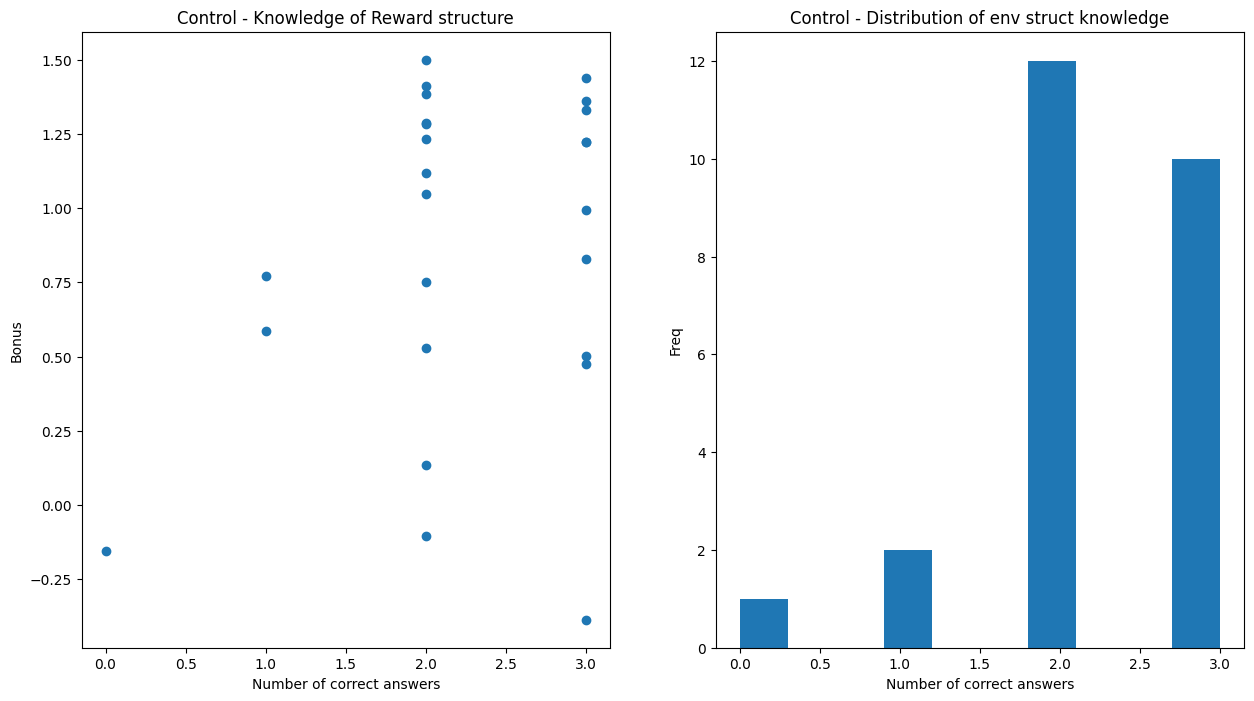

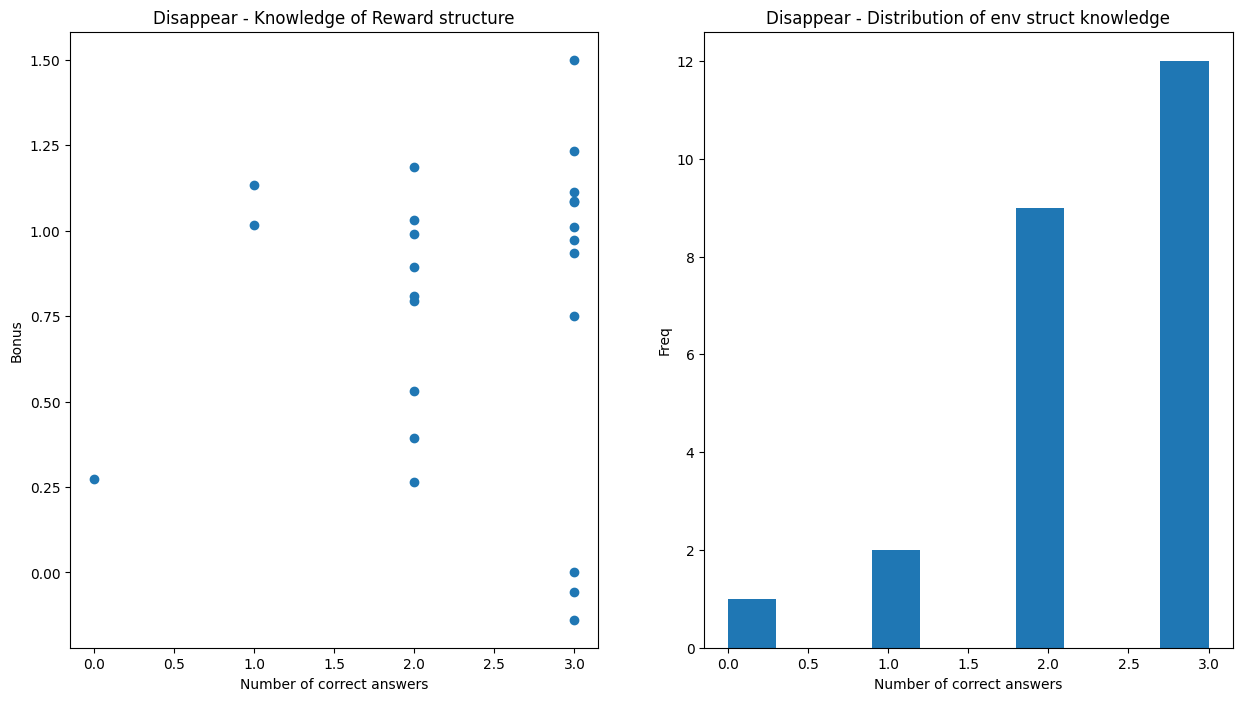

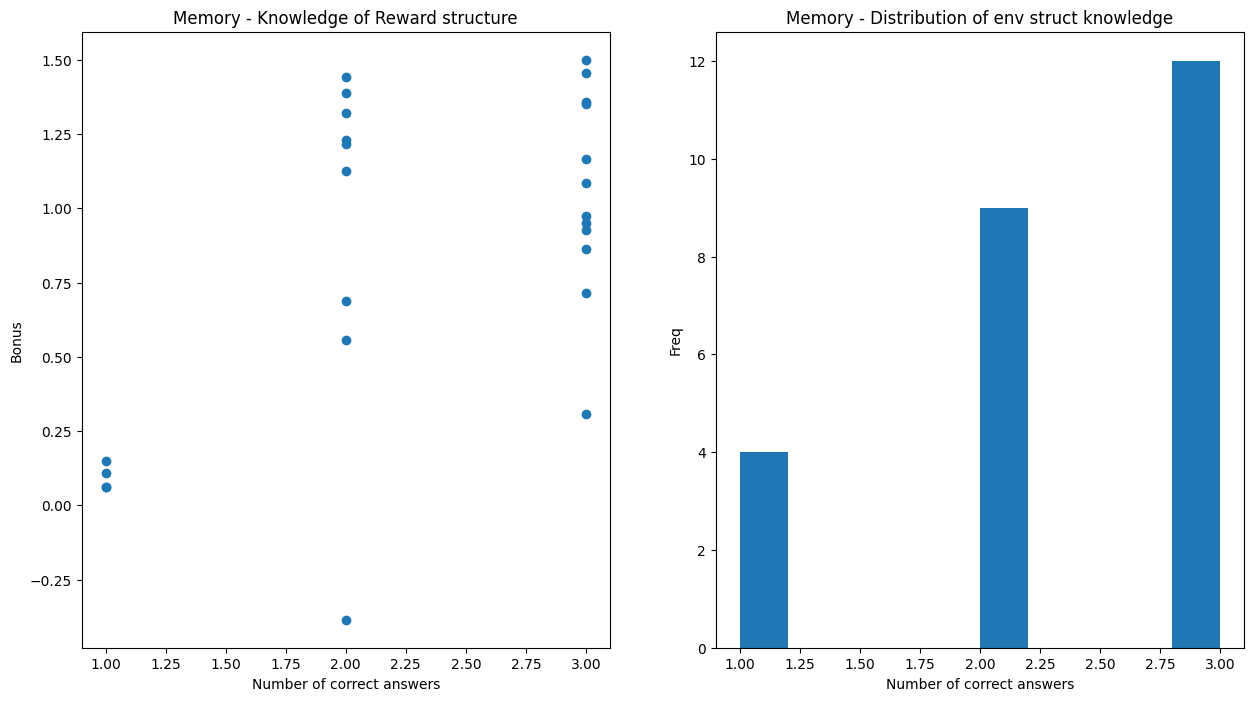

In [45]:


for idx, (cond, condname) in enumerate(conditions.items()):
    plt.figure(figsize=(5 * len(conditions),4 * 2))
    plt.subplot(1,2,1)
    plt.scatter(num_correct[cond], bonus[cond])
    plt.xlabel("Number of correct answers")
    plt.ylabel("Bonus")
    plt.title(f"{condname} - Knowledge of Reward structure")
    plt.subplot(1,2,2)
    plt.hist(num_correct[cond])
    plt.xlabel("Number of correct answers")
    plt.ylabel("Freq")
    plt.title(f"{condname} - Distribution of env struct knowledge")

plt.show()

In [46]:
questions_correct

{0: {'Q0': 22, 'Q1': 11, 'Q2': 23},
 1: {'Q0': 21, 'Q1': 12, 'Q2': 23},
 2: {'Q0': 24, 'Q1': 13, 'Q2': 21}}